This notebook clean and transform KLD Compustat.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('KLD_Compustat.csv', dtype={'gvkey': str})
data.rename(columns={'datadate_x':'datadate', 'cusip_x':'cusip'}, inplace=True)
data.shape

/Users/shinggg/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (184,200,204) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(43331, 1122)

In [3]:
print(data.columns.to_list())

['ticker_KLD', 'cusip_KLD', 'companyname', 'year', 'date', 'permno', 'gvkey', 'datadate', 'fyear', 'cusip', 'ticker', 'companyid', 'env_str_a', 'env_str_b', 'env_str_c', 'env_str_d', 'env_str_f', 'env_str_x', 'env_str_num', 'env_con_a', 'env_con_b', 'env_con_c', 'env_con_d', 'env_con_e', 'env_con_x', 'env_con_num', 'com_str_a', 'com_str_b', 'com_str_c', 'com_str_x', 'com_str_num', 'com_con_a', 'com_con_b', 'com_con_d', 'com_con_x', 'com_con_num', 'hum_con_a', 'hum_con_b', 'hum_con_num', 'emp_str_a', 'emp_str_b', 'emp_str_c', 'emp_str_d', 'emp_str_f', 'emp_str_x', 'emp_str_num', 'emp_con_a', 'emp_con_b', 'emp_con_c', 'emp_con_x', 'emp_con_num', 'div_str_a', 'div_str_b', 'div_str_c', 'div_str_d', 'div_str_e', 'div_str_f', 'div_str_x', 'div_str_num', 'div_con_a', 'div_con_x', 'div_con_num', 'pro_str_a', 'pro_str_b', 'pro_str_c', 'pro_str_x', 'pro_str_num', 'pro_con_a', 'pro_con_d', 'pro_con_e', 'pro_con_x', 'pro_con_num', 'cgov_str_a', 'cgov_str_c', 'cgov_str_x', 'cgov_str_num', 'cgov_con

In [4]:
data.sort_values(by=['gvkey', 'fyear'])

,ticker_KLD,cusip_KLD,companyname,year,date,permno,gvkey,datadate,fyear,cusip,...,prcc_f,prch_f,prcl_f,adjex_f,rank,au,auop,auopic,ceoso,cfoso
0,AIR,00036110,AAR CORPORATION,2003,2003-12-31,54594.0,001004,2004-05-31,2003.0,00036110,...,9.58,16.87,4.59,1.0,1.0,6.0,1.0,NaN,Y,Y
1,AIR,00036110,AAR CORPORATION,2004,2004-12-31,54594.0,001004,2005-05-31,2004.0,00036110,...,16.04,16.13,8.86,1.0,1.0,6.0,1.0,1.0,Y,Y
2,AIR,00036110,AAR CORPORATION,2005,2005-12-30,54594.0,001004,2006-05-31,2005.0,00036110,...,24.08,29.32,14.80,1.0,1.0,6.0,1.0,1.0,Y,Y
3,AIR,00036110,AAR CORPORATION,2006,2006-12-29,54594.0,001004,2007-05-31,2006.0,00036110,...,32.50,33.75,19.40,1.0,1.0,6.0,1.0,1.0,Y,Y
4,AIR,00036110,AAR CORPORATION,2007,2007-12-31,54594.0,001004,2008-05-31,2007.0,00036110,...,19.28,39.42,18.75,1.0,1.0,6.0,1.0,1.0,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43326,FF,36116M10,FUTUREFUEL CORP.,2015,2015-12-31,12615.0,287462,2015-12-31,2015.0,36116M10,...,13.50,16.08,9.11,1.0,1.0,9.0,1.0,1.0,Y,Y
43327,FF,36116M10,FUTUREFUEL CORP.,2016,2016-12-30,12615.0,287462,2016-12-31,2016.0,36116M10,...,13.90,16.58,9.77,1.0,1.0,9.0,1.0,1.0,Y,Y
43328,PAH,72766Q10,PLATFORM SPECIALTY PRODUCTS CORPORATION,2014,2014-12-31,14406.0,315318,2014-12-31,2014.0,72766Q10,...,23.22,28.95,13.75,1.0,1.0,6.0,1.0,0.0,Y,Y
43329,PAH,72766Q10,PLATFORM SPECIALTY PRODUCTS CORPORATION,2015,2015-12-31,14406.0,315318,2015-12-31,2015.0,72766Q10,...,12.83,28.44,9.25,1.0,1.0,7.0,4.0,2.0,Y,Y


Number of unique company based on _gvkey_ column:

In [5]:
data.gvkey.nunique()

5222

## 1. Construct variables using KLD 
### 1.1 Collect positive and negative performance indicator list
Column names contains "str" ("con") corresponding to positive (negative) performance indicators, respectively.

In [6]:
data.columns[data.columns.str.contains("_str_")]

Index(['env_str_a', 'env_str_b', 'env_str_c', 'env_str_d', 'env_str_f',
       'env_str_x', 'env_str_num', 'com_str_a', 'com_str_b', 'com_str_c',
       'com_str_x', 'com_str_num', 'emp_str_a', 'emp_str_b', 'emp_str_c',
       'emp_str_d', 'emp_str_f', 'emp_str_x', 'emp_str_num', 'div_str_a',
       'div_str_b', 'div_str_c', 'div_str_d', 'div_str_e', 'div_str_f',
       'div_str_x', 'div_str_num', 'pro_str_a', 'pro_str_b', 'pro_str_c',
       'pro_str_x', 'pro_str_num', 'cgov_str_a', 'cgov_str_c', 'cgov_str_x',
       'cgov_str_num', 'com_str_d', 'com_str_f', 'hum_str_a', 'hum_str_x',
       'hum_str_num', 'div_str_g', 'cgov_str_d', 'hum_str_d', 'hum_str_g',
       'emp_str_g', 'com_str_g', 'cgov_str_e', 'env_str_g', 'cgov_str_f',
       'com_str_h', 'emp_str_h', 'div_str_h', 'pro_str_d', 'env_str_h',
       'env_str_i', 'env_str_j', 'emp_str_i', 'emp_str_j', 'emp_str_k',
       'emp_str_l', 'cgov_str_g', 'cgov_str_h', 'gov_str_num', 'env_str_k',
       'env_str_l', 'env_str_m', 'env_s

In [7]:
sum(data.columns.str.contains("_str_"))

80

Column names contains "_num" represent total number of particular category indicators.

In [8]:
data.columns[data.columns.str.contains("str_num")]

Index(['env_str_num', 'com_str_num', 'emp_str_num', 'div_str_num',
       'pro_str_num', 'cgov_str_num', 'hum_str_num', 'gov_str_num'],
      dtype='object')

In [9]:
sum(data.columns.str.contains("str_num"))

8

In [10]:
data.columns[data.columns.str.contains("_con_")]

Index(['env_con_a', 'env_con_b', 'env_con_c', 'env_con_d', 'env_con_e',
       'env_con_x', 'env_con_num', 'com_con_a', 'com_con_b', 'com_con_d',
       'com_con_x', 'com_con_num', 'hum_con_a', 'hum_con_b', 'hum_con_num',
       'emp_con_a', 'emp_con_b', 'emp_con_c', 'emp_con_x', 'emp_con_num',
       'div_con_a', 'div_con_x', 'div_con_num', 'pro_con_a', 'pro_con_d',
       'pro_con_e', 'pro_con_x', 'pro_con_num', 'cgov_con_b', 'cgov_con_f',
       'cgov_con_num', 'alc_con_a', 'gam_con_a', 'mil_con_a', 'mil_con_b',
       'mil_con_c', 'mil_con_x', 'mil_con_num', 'nuc_con_a', 'nuc_con_c',
       'nuc_con_d', 'nuc_con_x', 'nuc_con_num', 'tob_con_a', 'emp_con_d',
       'cgov_con_x', 'div_con_b', 'hum_con_c', 'hum_con_d', 'hum_con_x',
       'alc_con_x', 'gam_con_x', 'alc_con_num', 'gam_con_num', 'tob_con_num',
       'hum_con_f', 'fir_con_a', 'tob_con_x', 'env_con_f', 'hum_con_g',
       'cgov_con_g', 'cgov_con_h', 'cgov_con_i', 'cgov_con_j', 'env_con_g',
       'env_con_h', 'env_con_i',

In [11]:
sum(data.columns.str.contains("_con_"))

82

In [12]:
data.columns[data.columns.str.contains("con_num")]

Index(['env_con_num', 'com_con_num', 'hum_con_num', 'emp_con_num',
       'div_con_num', 'pro_con_num', 'cgov_con_num', 'mil_con_num',
       'nuc_con_num', 'alc_con_num', 'gam_con_num', 'tob_con_num'],
      dtype='object')

In [13]:
sum(data.columns.str.contains("con_num"))

12

Collecting positive indicators using individual indicator method:

In [14]:
positive = data.columns[data.columns.str.contains("_str_") & ~data.columns.str.contains("str_num")]
len(positive)

72

In [15]:
negative = data.columns[data.columns.str.contains("_con_") & ~data.columns.str.contains("con_num")]
len(negative)

70

In [16]:
KLD_col_list = []

### 1.2 Construct Overall KLD Indices

Index by sum:

In [17]:
data['positive'] = data[positive].sum(axis=1)
data['negative'] = data[negative].sum(axis=1)
KLD_col_list.append('positive'); KLD_col_list.append('negative')

Index by average:

In [18]:
data['positive_avg'] = data[positive].mean(axis=1)
data['negative_avg'] = data[negative].mean(axis=1)
KLD_col_list.extend(['positive_avg', 'negative_avg'])

In [19]:
data[['positive', 'negative', 'positive_avg', 'negative_avg']]

,positive,negative,positive_avg,negative_avg
0,0.0,1.0,0.000000,0.027778
1,0.0,3.0,0.000000,0.083333
2,0.0,4.0,0.000000,0.102564
3,0.0,4.0,0.000000,0.102564
4,0.0,4.0,0.000000,0.100000
...,...,...,...,...
43326,1.0,1.0,0.090909,0.028571
43327,1.0,1.0,0.125000,0.028571
43328,0.0,0.0,0.000000,0.000000
43329,0.0,1.0,0.000000,0.028571


In [20]:
data['KLD Index'] = data['positive'] - data['negative']
data['KLD Index Norm'] = (data['positive'] - data['negative'])/(data['positive'] + data['negative'])

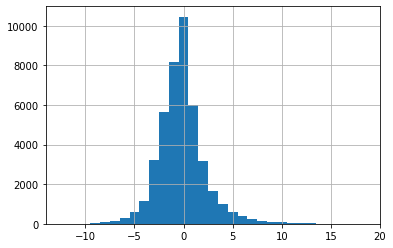

In [21]:
data['KLD Index'].hist(bins=31, align='left')

Check and fix division by zero in normalized index:

In [22]:
((data['positive']==0) & (data['negative']==0)).sum()

5327

In [23]:
((data['positive'] + data['negative']) ==0).sum()

5327

In [24]:
((data['positive'] - data['negative'])==0).sum()

10462

In [25]:
data['KLD Index Norm'].isna().sum()

5327

In [26]:
data['KLD Index Norm'].fillna(0, inplace=True) # set division by 0 result NaN to zero

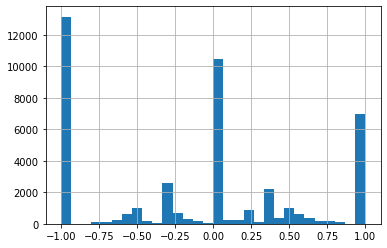

In [27]:
data['KLD Index Norm'].hist(bins=30, align='mid')

In [28]:
(data['KLD Index Norm']==0).sum()

10462

It can be skewed by the controversial issues. It does not preserve order of KLD Index. Say within +1, there are firms having zero negative with any positive values. This means they cannot be compared across within the same number.

In [29]:
(data['negative']==0).sum()

12275

In [30]:
((data['positive']!=0) & (data['negative']==0)).sum()

6948

In [31]:
12275 - 5327

6948

In [32]:
10462 - 5327

5135

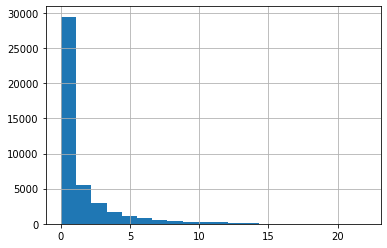

In [33]:
data['positive'].hist(bins=20)

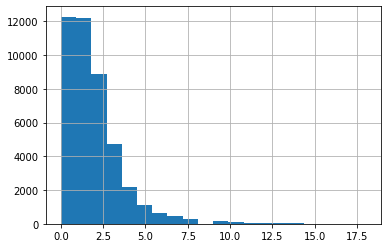

In [34]:
data['negative'].hist(bins=20)

In [35]:
KLD_summary = data['KLD Index'].describe()
KLD_summary['median'] = data['KLD Index'].median()
KLD_summary

count     43331.000000
mean         -0.183471
std           2.427169
min         -12.000000
25%          -2.000000
50%           0.000000
75%           1.000000
max          19.000000
median        0.000000
Name: KLD Index, dtype: float64

In [36]:
KLD_col_list.extend(['KLD Index', 'KLD Index Norm'])

### 1.3 Collect ESG level positive and negative performance indicator list
Column names contains "str" ("con") corresponding to positive (negative) performance indicators, respectively.

#### 1.3.1 Environment Performance Indicators:

In [37]:
E_pos = data.columns[data.columns.str.contains("env_str") & ~data.columns.str.contains("env_str_num")]
data['E_pos'] = data[E_pos].sum(axis=1)

E_neg = data.columns[data.columns.str.contains("env_con") & ~data.columns.str.contains("env_con_num")]
data['E_neg'] = data[E_neg].sum(axis=1)

data['E Index'] = data['E_pos'] - data['E_neg']

KLD_col_list.extend(['E_pos', 'E_neg', 'E Index'])

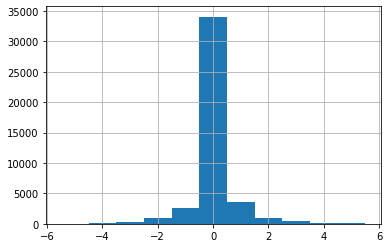

In [38]:
data['E Index'].hist(bins=11, align='left')

In [39]:
E_summary = data['E Index'].describe()
E_summary['median'] = data['E Index'].median()
E_summary

count     43331.000000
mean          0.042764
std           0.800844
min          -5.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
median        0.000000
Name: E Index, dtype: float64

#### 1.3.2 Social Performance Indicators:

In [40]:
S_pos = data.columns[data.columns.str.contains("com_str") & ~data.columns.str.contains("com_str_num") |
                     data.columns.str.contains("hum_str") & ~data.columns.str.contains("hum_str_num") |
                     data.columns.str.contains("emp_str") & ~data.columns.str.contains("emp_str_num") |
                     data.columns.str.contains("div_str") & ~data.columns.str.contains("div_str_num") |
                     data.columns.str.contains("pro_str") & ~data.columns.str.contains("pro_str_num")]
data['S_pos'] = data[S_pos].sum(axis=1)

S_neg = data.columns[data.columns.str.contains("com_con") & ~data.columns.str.contains("com_con_num") |
                     data.columns.str.contains("hum_con") & ~data.columns.str.contains("hum_con_num") |
                     data.columns.str.contains("emp_con") & ~data.columns.str.contains("emp_con_num") |
                     data.columns.str.contains("div_con") & ~data.columns.str.contains("div_con_num") |
                     data.columns.str.contains("pro_con") & ~data.columns.str.contains("pro_con_num")]
data['S_neg'] = data[S_neg].sum(axis=1)

data['S Index'] = data['S_pos'] - data['S_neg']

KLD_col_list.extend(['S_pos', 'S_neg', 'S Index'])

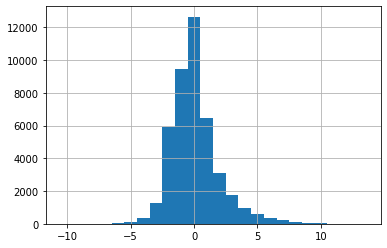

In [41]:
data['S Index'].hist(bins=24, align='left')

In [42]:
S_summary = data['S Index'].describe()
S_summary['median'] = data['S Index'].median()
S_summary

count     43331.000000
mean          0.062842
std           1.918233
min         -10.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max          14.000000
median        0.000000
Name: S Index, dtype: float64

#### 1.3.3 Governance Performance Indicators:

In [43]:
G_pos = data.columns[data.columns.str.contains("cgov_str") & ~data.columns.str.contains("cgov_str_num")]
data['G_pos'] = data[G_pos].sum(axis=1)

G_neg = data.columns[data.columns.str.contains("cgov_con") & ~data.columns.str.contains("cgov_con_num")]
data['G_neg'] = data[G_neg].sum(axis=1)

data['G Index'] = data['G_pos'] - data['G_neg']

KLD_col_list.extend(['G_pos', 'G_neg', 'G Index'])

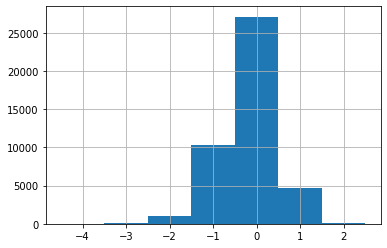

In [44]:
data['G Index'].hist(bins=7, align='left')

In [45]:
G_summary = data['G Index'].describe()
G_summary['median'] = data['G Index'].median()
G_summary

count     43331.000000
mean         -0.178394
std           0.662138
min          -4.000000
25%          -1.000000
50%           0.000000
75%           0.000000
max           3.000000
median        0.000000
Name: G Index, dtype: float64

#### 1.3.4 Controversial Business Involvement Indicators:
<div class="alert alert-block alert-warning">
<b>Warning:</b> "fir" has no "fir_con_num" so do NOT use "_num" columns to calculate aggregates.
</div>

In [46]:
Controv = data.columns[data.columns.str.contains("alc_") & ~data.columns.str.contains("alc_con_num") |
                       data.columns.str.contains("fir_") & ~data.columns.str.contains("fir_con_num") |
                       data.columns.str.contains("gam_") & ~data.columns.str.contains("gam_con_num") |
                       data.columns.str.contains("mil_") & ~data.columns.str.contains("mil_con_num") |
                       data.columns.str.contains("nuc_") & ~data.columns.str.contains("nuc_con_num") |
                       data.columns.str.contains("tob_") & ~data.columns.str.contains("tob_con_num")]
data['Controv'] = data[Controv].sum(axis=1)
data['Controv Index'] = - data['Controv']

KLD_col_list.extend(['Controv Index'])

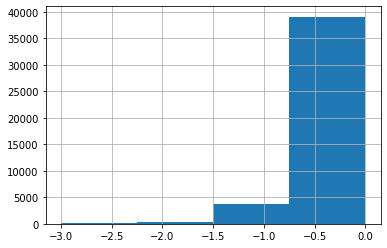

In [47]:
data['Controv Index'].hist(bins=4)

In [48]:
Controv_summary = data['Controv Index'].describe()
Controv_summary['median'] = data['Controv Index'].median()
Controv_summary

count     43331.000000
mean         -0.110683
std           0.354626
min          -3.000000
25%          -0.000000
50%          -0.000000
75%          -0.000000
max          -0.000000
median        0.000000
Name: Controv Index, dtype: float64

### 1.4 Construct Aggregate KLD Index from ESG & Controversial granular level

In [49]:
data['ESG_pos'] = data['E_pos'] + data['S_pos'] + data['G_pos']
data['ESG_neg'] = data['E_neg'] + data['S_neg'] + data['G_neg'] + data['Controv']
data['ESG Pos-Neg Index'] = data['ESG_pos'] - data['ESG_neg']
data['ESG Agg Index'] = data['E Index'] + data['S Index'] + data['G Index'] + data['Controv Index']

In [50]:
data['ESG Pos-Neg Index'].describe()

count    43331.000000
mean        -0.183471
std          2.427169
min        -12.000000
25%         -2.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: ESG Pos-Neg Index, dtype: float64

In [51]:
data['ESG Agg Index'].describe()

count    43331.000000
mean        -0.183471
std          2.427169
min        -12.000000
25%         -2.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: ESG Agg Index, dtype: float64

In [52]:
data['KLD Index'].describe()

count    43331.000000
mean        -0.183471
std          2.427169
min        -12.000000
25%         -2.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: KLD Index, dtype: float64

#### 1.4.1 Check that the aggregate results are the same using different methods above:

In [53]:
data['ESG Pos-Neg Index'].equals(data['ESG Agg Index'])

True

In [54]:
data['KLD Index'].equals(data['ESG Agg Index'])

True

In [55]:
data['ESG Pos-Neg Index'].describe().equals(data['ESG Agg Index'].describe())

True

In [56]:
data['KLD Index'].describe().equals(data['ESG Agg Index'].describe())

True

#### 1.4.2 Check that the positive and negative indicator lists are the same using different methods above:

In [57]:
set(positive) == set(E_pos.append(S_pos).append(G_pos))

True

In [58]:
set(negative) == set(E_neg.append(S_neg).append(G_neg).append(Controv))

True

### 1.5 Collect issue area positive and negative performance indicator list
Column names contains "str" ("con") corresponding to positive (negative) performance indicators, respectively.

#### 1.5.1 Community Performance Indicators:

In [59]:
COM_pos = data.columns[data.columns.str.contains("com_str") & ~data.columns.str.contains("com_str_num")]
data['COM_pos'] = data[COM_pos].sum(axis=1)

COM_neg = data.columns[data.columns.str.contains("com_con") & ~data.columns.str.contains("com_con_num")]
data['COM_neg'] = data[COM_neg].sum(axis=1)

data['ESG_COM'] = data['COM_pos'] - data['COM_neg']

KLD_col_list.extend(['COM_pos', 'COM_neg', 'ESG_COM'])

In [60]:
data['ESG_COM'].describe()

count    43331.000000
mean         0.097528
std          0.510039
min         -2.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: ESG_COM, dtype: float64

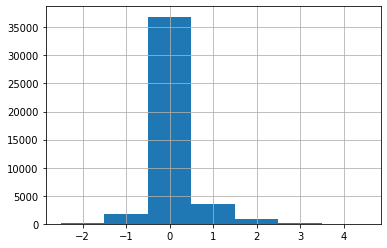

In [61]:
data['ESG_COM'].hist(bins=7, align='left')

#### 1.5.2 Diversity Performance Indicators:

In [62]:
DIV_pos = data.columns[data.columns.str.contains("div_str") & ~data.columns.str.contains("div_str_num")]
data['DIV_pos'] = data[DIV_pos].sum(axis=1)

DIV_neg = data.columns[data.columns.str.contains("div_con") & ~data.columns.str.contains("div_con_num")]
data['DIV_neg'] = data[DIV_neg].sum(axis=1)

data['ESG_DIV'] = data['DIV_pos'] - data['DIV_neg']

KLD_col_list.extend(['DIV_pos', 'DIV_neg', 'ESG_DIV'])

In [63]:
data['ESG_DIV'].describe()

count    43331.000000
mean         0.051534
std          1.222434
min         -3.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: ESG_DIV, dtype: float64

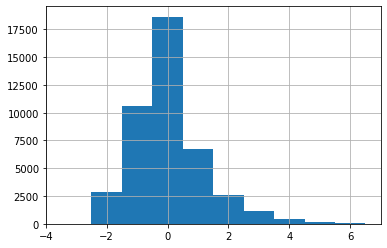

In [64]:
data['ESG_DIV'].hist(bins=10, align='left')

#### 1.5.3 Employee Relations Performance Indicators:

In [65]:
EMP_pos = data.columns[data.columns.str.contains("emp_str") & ~data.columns.str.contains("emp_str_num")]
data['EMP_pos'] = data[EMP_pos].sum(axis=1)

EMP_neg = data.columns[data.columns.str.contains("emp_con") & ~data.columns.str.contains("emp_con_num")]
data['EMP_neg'] = data[EMP_neg].sum(axis=1)

data['ESG_EMP'] = data['EMP_pos'] - data['EMP_neg']

KLD_col_list.extend(['EMP_pos', 'EMP_neg', 'ESG_EMP'])

In [66]:
data['ESG_EMP'].describe()

count    43331.000000
mean         0.052087
std          0.955283
min         -4.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: ESG_EMP, dtype: float64

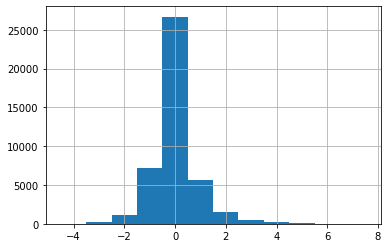

In [67]:
data['ESG_EMP'].hist(bins=12, align='left')

#### 1.5.4 Environment Performance Indicators:

In [68]:
ENV_pos = data.columns[data.columns.str.contains("env_str") & ~data.columns.str.contains("env_str_num")]
data['ENV_pos'] = data[ENV_pos].sum(axis=1)

ENV_neg = data.columns[data.columns.str.contains("env_con") & ~data.columns.str.contains("env_con_num")]
data['ENV_neg'] = data[ENV_neg].sum(axis=1)

data['ESG_ENV'] = data['ENV_pos'] - data['ENV_neg']

KLD_col_list.extend(['ENV_pos', 'ENV_neg', 'ESG_ENV'])

In [69]:
data['ESG_ENV'].describe()

count    43331.000000
mean         0.042764
std          0.800844
min         -5.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: ESG_ENV, dtype: float64

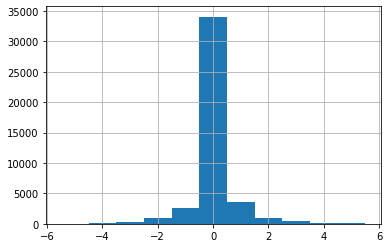

In [70]:
data['ESG_ENV'].hist(bins=11, align='left')

#### 1.5.5 Human Rights Performance Indicators:

In [71]:
HUM_pos = data.columns[data.columns.str.contains("hum_str") & ~data.columns.str.contains("hum_str_num")]
data['HUM_pos'] = data[HUM_pos].sum(axis=1)

HUM_neg = data.columns[data.columns.str.contains("hum_con") & ~data.columns.str.contains("hum_con_num")]
data['HUM_neg'] = data[HUM_neg].sum(axis=1)

data['ESG_HUM'] = data['HUM_pos'] - data['HUM_neg']

KLD_col_list.extend(['HUM_pos', 'HUM_neg', 'ESG_HUM'])

In [72]:
data['ESG_HUM'].describe()

count    43331.000000
mean        -0.032263
std          0.267947
min         -3.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: ESG_HUM, dtype: float64

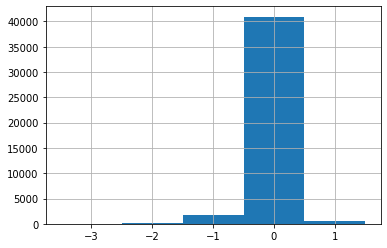

In [73]:
data['ESG_HUM'].hist(bins=5, align='left')

#### 1.5.6 Product Quality Performance Indicators:

In [74]:
PRO_pos = data.columns[data.columns.str.contains("pro_str") & ~data.columns.str.contains("pro_str_num")]
data['PRO_pos'] = data[PRO_pos].sum(axis=1)

PRO_neg = data.columns[data.columns.str.contains("pro_con") & ~data.columns.str.contains("pro_con_num")]
data['PRO_neg'] = data[PRO_neg].sum(axis=1)

data['ESG_PRO'] = data['PRO_pos'] - data['PRO_neg']

KLD_col_list.extend(['PRO_pos', 'PRO_neg', 'ESG_PRO'])

In [75]:
data['ESG_PRO'].describe()

count    43331.000000
mean        -0.106044
std          0.591183
min         -4.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: ESG_PRO, dtype: float64

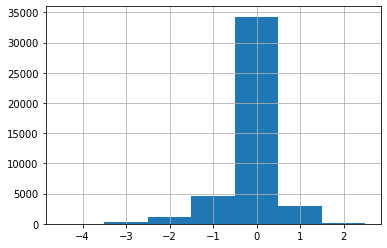

In [76]:
data['ESG_PRO'].hist(bins=7, align='left')

In [77]:
(data['PRO_pos']==data['pro_str_num']).sum()

36932

#### 1.5.7 Corporate Governance Performance Indicators:

In [78]:
CGOV_pos = data.columns[data.columns.str.contains("cgov_str") & ~data.columns.str.contains("cgov_str_num")]
data['CGOV_pos'] = data[CGOV_pos].sum(axis=1)

CGOV_neg = data.columns[data.columns.str.contains("cgov_con") & ~data.columns.str.contains("cgov_con_num")]
data['CGOV_neg'] = data[CGOV_neg].sum(axis=1)

data['ESG_CGOV'] = data['CGOV_pos'] - data['CGOV_neg']

KLD_col_list.extend(['CGOV_pos', 'CGOV_neg', 'ESG_CGOV'])

In [79]:
data['ESG_CGOV'].describe()

count    43331.000000
mean        -0.178394
std          0.662138
min         -4.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: ESG_CGOV, dtype: float64

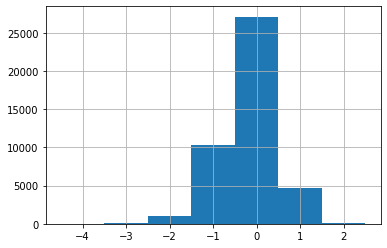

In [80]:
data['ESG_CGOV'].hist(bins=7, align='left')

### 1.6 Construct Aggregate KLD Index from issue area level

In [81]:
data['ESG_A_ex_CG_pos'] = data['COM_pos'] + data['DIV_pos'] + data['EMP_pos'] + data['ENV_pos'] + data['HUM_pos'] + data['PRO_pos']
data['ESG_A_ex_CG_neg'] = data['COM_neg'] + data['DIV_neg'] + data['EMP_neg'] + data['ENV_neg'] + data['HUM_neg'] + data['PRO_neg']
data['ESG Pos-Neg Ex-CG Index'] = data['ESG_A_ex_CG_pos'] - data['ESG_A_ex_CG_neg']

data['ESG_A_pos'] = data['ESG_A_ex_CG_pos'] + data['CGOV_pos']
data['ESG_A_neg'] = data['ESG_A_ex_CG_neg'] + data['CGOV_neg']
data['ESG Pos-Neg A Index'] = data['ESG_A_pos'] - data['ESG_A_neg']

KLD_col_list.extend(['ESG_A_ex_CG_pos', 'ESG_A_ex_CG_neg', 'ESG Pos-Neg Ex-CG Index',
                'ESG_A_pos', 'ESG_A_neg', 'ESG Pos-Neg A Index'])

In [82]:
data['ESG Pos-Neg Ex-CG Index'].describe()

count    43331.000000
mean         0.105606
std          2.264440
min         -9.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max         18.000000
Name: ESG Pos-Neg Ex-CG Index, dtype: float64

In [83]:
data['ESG Pos-Neg A Index'].describe()

count    43331.000000
mean        -0.072789
std          2.398469
min        -11.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: ESG Pos-Neg A Index, dtype: float64

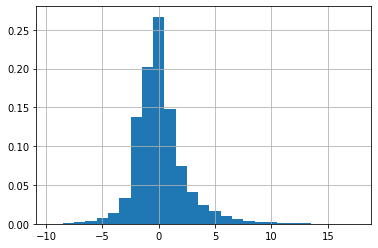

In [84]:
data['ESG Pos-Neg Ex-CG Index'].hist(bins=27, align='left', density=True)

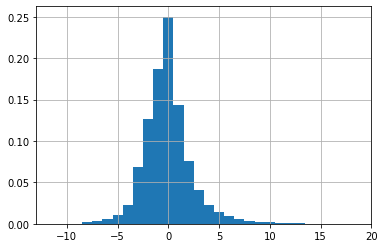

In [85]:
data['ESG Pos-Neg A Index'].hist(bins=30, align='left', density=True)

In [86]:
((data['ESG Pos-Neg A Index'] - data['ESG Pos-Neg A Index'].mean())/data['ESG Pos-Neg A Index'].std()).describe()

count    4.333100e+04
mean     1.311842e-18
std      1.000000e+00
min     -4.555912e+00
25%     -3.865848e-01
50%      3.034792e-02
75%      4.472806e-01
max      7.952069e+00
Name: ESG Pos-Neg A Index, dtype: float64

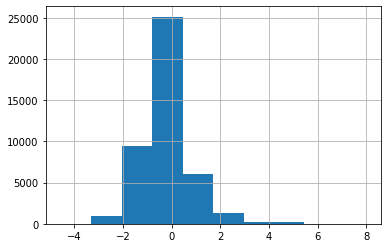

In [87]:
((data['ESG Pos-Neg A Index'] - data['ESG Pos-Neg A Index'].mean())/data['ESG Pos-Neg A Index'].std()).hist()

Display a list of variable constructed:

In [88]:
print(KLD_col_list)

['positive', 'negative', 'positive_avg', 'negative_avg', 'KLD Index', 'KLD Index Norm', 'E_pos', 'E_neg', 'E Index', 'S_pos', 'S_neg', 'S Index', 'G_pos', 'G_neg', 'G Index', 'Controv Index', 'COM_pos', 'COM_neg', 'ESG_COM', 'DIV_pos', 'DIV_neg', 'ESG_DIV', 'EMP_pos', 'EMP_neg', 'ESG_EMP', 'ENV_pos', 'ENV_neg', 'ESG_ENV', 'HUM_pos', 'HUM_neg', 'ESG_HUM', 'PRO_pos', 'PRO_neg', 'ESG_PRO', 'CGOV_pos', 'CGOV_neg', 'ESG_CGOV', 'ESG_A_ex_CG_pos', 'ESG_A_ex_CG_neg', 'ESG Pos-Neg Ex-CG Index', 'ESG_A_pos', 'ESG_A_neg', 'ESG Pos-Neg A Index']


In [89]:
len(KLD_col_list)

43

## 2. Construct variables using Compustat

In [90]:
Comp_col_list = []

List of variables to be kept：

In [91]:
Comp_col_list.extend(['sale', 'cogs', 'ppegt', 'xsga', 'xlr', 'emp', 'xad', 'xrd', 'at', 'sich', 'ppent', 'aqc', 'capx', 'capxv'])

In [92]:
# fin_ratios = pd.read_csv('data/fin_ratios.csv.gz', dtype={'gvkey': str})
# fin_ratios.shape

In [93]:
# fin_ratios.columns

In [94]:
# fin_ratios.sort_values(['gvkey', 'adate'], inplace=True)

In [95]:
# fin_ratios['adate'] = pd.to_datetime(fin_ratios['adate'], format='%Y%m%d')
# fin_ratios['qdate'] = pd.to_datetime(fin_ratios['adate'], format='%Y%m%d')
# fin_ratios['public_date'] = pd.to_datetime(fin_ratios['adate'], format='%Y%m%d')

In [96]:
# data_gpm=fin_ratios[['gvkey', 'adate', 'qdate', 'public_date', 'gpm', 'npm', 'roe']].groupby(['gvkey', 'adate'], as_index=False).max()

In [97]:
# data_gpm[data_gpm['gvkey']==12141][['gvkey', 'adate', 'qdate', 'public_date', 'gpm', 'npm', 'roe']]

In [98]:
# data.rename(columns={'datadate_x':'datadate'}, inplace=True)

### 2.1 Profitability Ratios

#### 2.1.1 Gross Profit Margin

In [99]:
# gross profit margin, SAS: gpm=coalesce(gp,revt-cogs,sale-cogs)/sale; /*gross profit margin*/
data['gpm'] = np.where(data['gp'].isnull(), (data["revt"]-data["cogs"])/data['sale'], data['gp']/data['sale'])
data['gpm'] = np.where(data['gpm'].isnull(), (data["sale"]-data["cogs"])/data['sale'], data['gpm'])
#data['gpm'] = np.where(data['gpm'].isnull(), 0, data['gpm']) # fill missing with 0.
Comp_col_list.append('gpm')

#### 2.1.2 Net Profit Margin

In [100]:
# Net Profit Margin
data['npm'] = data['ib'] / data['sale']
Comp_col_list.append('npm')

#### 2.1.3 Return on Assets

In [101]:
# SAS: roa=coalesce(oibdp,sale-xopr,revt-xopr)/((at+lag(at))/2); /*Return on Assets*/ 
data['roa'] = np.where(data['oibdp'].isnull(), (data["sale"]-data["xopr"])/data['at'], data['oibdp']/data['at'])
data['roa'] = np.where(data['roa'].isnull(), (data["revt"]-data["xopr"])/data['at'], data['roa'])
Comp_col_list.append('roa')

#### 2.1.4 Return on Equity

In [102]:
# create preferrerd stock
data['ps'] = np.where(data['pstkrv'].isnull(), data['pstkl'], data['pstkrv'])
data['ps'] = np.where(data['ps'].isnull(), data['pstk'], data['ps'])
data['ps'] = np.where(data['ps'].isnull(), 0, data['ps'])

# Deferred Taxes and Investment Tax Credit, SAS: coalesce(TXDITC,sum(TXDB, ITCB))
data['txditc'] = np.where(data['txditc'].isnull(), data['txdb']+data['itcb'], data['txditc'])
data['txditc'] = np.where(data['txditc'].isnull(), 0, data['txditc'])

# create book equity
data['be'] = data['seq'] + data['txditc'] - data['ps']
data['be'] = np.where(data['be']>0, data['be'], np.nan)

# Return on Equity
data['roe'] = data['ib'] / data['be']

Comp_col_list.append('roe')

### 2.2 Valuation Ratios

#### 2.2.1 Book to Market

In [103]:
# SAS: bm = BE/(prcc_f*csho)
data['bm'] = data['be'] / (data['prcc_f'] * data['csho'])
Comp_col_list.append('bm')

#### 2.2.2 Enterprise Value Multiple

In [104]:
# SAS: evm=sum(dltt,dlc,mib,ps, prcc_f*csho)/coalesce(ebitda,oibdp,sale-cogs-xsga); /*Enterprise Value Multiple*/
# EBITDA
data['ebitda'] = np.where(data['ebitda'].isnull(), data['oibdp'], data['ebitda'])
data['ebitda'] = np.where(data['ebitda'].isnull(), data['sale']-data['cogs']-data['xsga'], data['ebitda'])

# EV
data['ev'] = data['dltt'] + data['dlc'] + data['mib'] + data['ps'] + (data['prcc_f'] * data['csho'])

# EVM
data['evm'] = data['ev'] / data['ebitda']
Comp_col_list.append('evm')

#### 2.2.3 Price-to-Earnings

In [105]:
# Price-to-Earnings, excl. Extraordinary Items (diluted)
data['pe_exi'] = data['prcc_f'] / data['epsfx']

# Price-to-Earnings, incl. Extraordinary Items (diluted)
data['pe_inc'] = data['prcc_f'] / data['epsfi']

# Price-to-Earnings using market cap
data['pe_ib'] = data['prcc_f'] * data['csho'] / data['ib']
data['pe_ni'] = data['prcc_f'] * data['csho'] / data['ni']

Comp_col_list.extend(['pe_exi', 'pe_inc', 'pe_ib', 'pe_ni'])

### 2.3 Miscallenous Ratios

#### 2.3.1 R&D expenses as a fraction of Sales

In [106]:
data['rd_sale'] = (data['xrd']+0) / data['sale']

#### 2.3.2 Advertising Expenses as a fraction of Sales

In [107]:
data['adv_sale'] = (data['xad']+0) / data['sale']

#### 2.3.3 SG&A Expenses as a fraction of Sales

In [108]:
data['xsga_sale'] = (data['xsga']+0) / data['sale']

In [109]:
Comp_col_list.extend(['rd_sale', 'adv_sale', 'xsga_sale'])

### 2.4 Markup, Profitability and Market Power Proxies

Rise in markups does not necessarily imply that firms have more market
power, and therefore higher economic profits. In fact, increasing markups can come from a
variety of reasons that are not associated with a decline in aggregate welfare.
For example, a
decrease in marginal costs, an increase in fixed costs or innovation, an increase in demand or
in its elasticity, a change in the market structure, new product varieties, all lead to increasing
markups without necessarily implying higher profit.

While the textbook definition of market power is the case whereby a firm can command
a price above the marginal cost of production (markup), any conclusions regarding whether
market power increased will greatly depend on the pattern of overhead costs, or any other
factor affecting the cost structure of firms (like innovation activities such as R&D). Therefore,
before we can conclude whether the higher markups are associated with market power, we
need to analyze profits. In the absence of detailed data, the mapping from markups to market
power (and therefore welfare) can only be done through a particular model of the economy.

Profits do not necessarily derive exclusively from market power. There could be capital market imperfections
that constrain investment and lead to higher profits. However, in a model with both market power and financial
frictions, Cooper and Ejarque (2003) find that profitability is explained entirely by market power and none by
financial frictions. In this paper, we do, however, abstract away from such frictions.

With the accounting data available, we assume that we can observe profits as the wedge
between sales and all variable and fixed costs (including innovation, advertising, and others).
In what follows we consider higher market power a situation whereby a firm can generate
higher profits

markup: sale, cogs, ppegt (capital stock), xsga, xlr (Wage Bill included in cogs), emp

PIRIC from FRED


#### 2.4.1 Accounting Markup or Profit Rate (Ratio of sales-to-total costs)
Average and marginal costs are equated (which is consistent with assuming constant returns to scale in production), and moreover that all cost items are considered variable inputs in production.

In [110]:
data['markup_acct'] = data['sale'] / data['cogs'] # i.e. the output elasticity is now calibrated to one

#### 2.4.2 Market Value share of Sales & Dividends share of Sales
The flow of profits may not be the best measure of profitability of the firm, because it mixes
up the firm’s result with investment decisions. To that effect, we consider as a measure of
profitability based on what firms generate as a return to their shareholders.

Our first measure, market value, is essentially
the discounted sum of dividends, since a shareholder who sells shares in a firm gives up the
opportunity value of receiving the indefinite stream of dividend payments. In contrast to the
actual dividends, the market price is more a measure of future expected profits, not just contemporaneous
profits, since it takes into account the flow of all expected future dividends.

In [111]:
data['market_sale'] = (data['prcc_f'] * data['csho']) / data['sale']
data['div_sale'] = data['dvc'] / data['sale']

#### 2.4.3 Production-based Markups & Profit rates as a measure of market power
Constant output elasticity = 0.85 or 0.83 (after 1990) or 0.95 with overhead costs 

Measure of the user cost of capital = r = 12%

firm profits = sales - costs of good sold - r * ppegt - xsga

operation profit = sales - costs of good sold - xsga

profit rate = firm profit / sale

In [112]:
data['markup'] = 0.85 * data['sale'] / data['cogs']
data['makrup_overhead'] = 0.95 * data['sale'] / (data['cogs'] + data['xsga'])
data['econ_profit'] = data['sale'] - data['cogs'] - 0.12 * data['ppegt'] - data['xsga']
data['profit_rate'] = data['econ_profit'] / data['sale']
data['op_profit_rate'] = (data['sale'] - data['cogs'] - data['xsga']) / data['sale']
data['econ_roa'] = data['econ_profit'] / data['at']

When we evaluate the extensive margin – whether a firm does or does
not have expenditures on R&D or Advertising

In [113]:
Comp_col_list.extend(['markup_acct', 'market_sale', 'div_sale', 'markup',
                      'makrup_overhead','econ_profit','profit_rate','op_profit_rate', 'econ_roa'])

In [114]:
Comp_col_list

['sale',
 'cogs',
 'ppegt',
 'xsga',
 'xlr',
 'emp',
 'xad',
 'xrd',
 'at',
 'sich',
 'ppent',
 'aqc',
 'capx',
 'capxv',
 'gpm',
 'npm',
 'roa',
 'roe',
 'bm',
 'evm',
 'pe_exi',
 'pe_inc',
 'pe_ib',
 'pe_ni',
 'rd_sale',
 'adv_sale',
 'xsga_sale',
 'markup_acct',
 'market_sale',
 'div_sale',
 'markup',
 'makrup_overhead',
 'econ_profit',
 'profit_rate',
 'op_profit_rate',
 'econ_roa']

### 2.5 Control Variables

In [115]:
Control_col_list = []

#### Size: Natural logarithm of total assets in  \\$ Million

In [116]:
data['size'] = np.log(data['at'])

#### Leverage ratio: the ratio of total debt to the market value of equity

In [117]:
data['lev'] = (data['dltt'] + data['dlc']) / (data['prcc_f'] * data['csho'])

#### R&D Intensity
research and development expenditures over sales

In [118]:
data['rdi'] = data['xrd'] / data['sale']

#### Advertising Intensity
advertising expenses over sales;

In [119]:
data['adi'] = data['xad'] / data['sale']

#### Beta from CAPM:
We otain BETA from WRDS Beta Suite using market model CAPM. In these estimations, we use 60 months windows and we require a minimum of 24 months of observations. We pick beta at the end of June of year $t$.

In [120]:
data_beta = pd.read_csv('data/CAPM_beta.csv.gz', usecols=['PERMNO', 'DATE', 'b_mkt'], date_parser='DATE')
data_beta.sort_values(['PERMNO', 'DATE'], inplace=True)
data_beta['DATE'] = pd.to_datetime(data_beta['DATE'], format='%Y/%m/%d')
data_beta = data_beta.groupby('PERMNO', as_index=False).resample('AS-JUN', on='DATE').first()
data_beta.rename(columns={"DATE":"date", "PERMNO":"permno"}, inplace=True)
data_beta.reset_index(inplace=True)
data_beta.drop(columns='level_0', inplace=True)
data_beta['year'] = data_beta['DATE'].dt.year
data_beta.drop(columns='DATE', inplace=True)

In [121]:
data_beta.drop(columns='date', inplace=True)

In [122]:
data_beta.head()

,permno,b_mkt,year
0,10001.0,0.0974,1989
1,10001.0,0.0811,1990
2,10001.0,0.0715,1991
3,10001.0,0.0164,1992
4,10001.0,-0.1172,1993


In [123]:
data = data.merge(data_beta, on=['permno', 'year'], how='left') # reduced to 41526 rows if using inner merge.

In [124]:
data[['permno', 'year', 'fyear', 'datadate','date', 'b_mkt']].head()

,permno,year,fyear,datadate,date,b_mkt
0,54594.0,2003,2003.0,2004-05-31,2003-12-31,1.1327
1,54594.0,2004,2004.0,2005-05-31,2004-12-31,1.4483
2,54594.0,2005,2005.0,2006-05-31,2005-12-30,1.7114
3,54594.0,2006,2006.0,2007-05-31,2006-12-29,2.3594
4,54594.0,2007,2007.0,2008-05-31,2007-12-31,2.1797


In [125]:
Control_col_list.extend(['size', 'lev', 'b_mkt', 'rdi', 'adi'])

In [126]:
Control_col_list

['size', 'lev', 'b_mkt', 'rdi', 'adi']

## Collection of variables to be kept

In [127]:
var_list = ['ticker_KLD', 'cusip_KLD', 'companyname', 'year', 'date', 'permno', 'gvkey', 'datadate', 'fyear', 'cusip', 'ticker', 'companyid']

In [128]:
var_list.extend(Control_col_list)
var_list.extend(Comp_col_list)
var_list.extend(KLD_col_list)

In [129]:
var_list

['ticker_KLD',
 'cusip_KLD',
 'companyname',
 'year',
 'date',
 'permno',
 'gvkey',
 'datadate',
 'fyear',
 'cusip',
 'ticker',
 'companyid',
 'size',
 'lev',
 'b_mkt',
 'rdi',
 'adi',
 'sale',
 'cogs',
 'ppegt',
 'xsga',
 'xlr',
 'emp',
 'xad',
 'xrd',
 'at',
 'sich',
 'ppent',
 'aqc',
 'capx',
 'capxv',
 'gpm',
 'npm',
 'roa',
 'roe',
 'bm',
 'evm',
 'pe_exi',
 'pe_inc',
 'pe_ib',
 'pe_ni',
 'rd_sale',
 'adv_sale',
 'xsga_sale',
 'markup_acct',
 'market_sale',
 'div_sale',
 'markup',
 'makrup_overhead',
 'econ_profit',
 'profit_rate',
 'op_profit_rate',
 'econ_roa',
 'positive',
 'negative',
 'positive_avg',
 'negative_avg',
 'KLD Index',
 'KLD Index Norm',
 'E_pos',
 'E_neg',
 'E Index',
 'S_pos',
 'S_neg',
 'S Index',
 'G_pos',
 'G_neg',
 'G Index',
 'Controv Index',
 'COM_pos',
 'COM_neg',
 'ESG_COM',
 'DIV_pos',
 'DIV_neg',
 'ESG_DIV',
 'EMP_pos',
 'EMP_neg',
 'ESG_EMP',
 'ENV_pos',
 'ENV_neg',
 'ESG_ENV',
 'HUM_pos',
 'HUM_neg',
 'ESG_HUM',
 'PRO_pos',
 'PRO_neg',
 'ESG_PRO',
 '

In [130]:
len(var_list)

96

In [131]:
df = data[var_list]

In [132]:
df.head()

,ticker_KLD,cusip_KLD,companyname,year,date,permno,gvkey,datadate,fyear,cusip,...,ESG_PRO,CGOV_pos,CGOV_neg,ESG_CGOV,ESG_A_ex_CG_pos,ESG_A_ex_CG_neg,ESG Pos-Neg Ex-CG Index,ESG_A_pos,ESG_A_neg,ESG Pos-Neg A Index
0,AIR,00036110,AAR CORPORATION,2003,2003-12-31,54594.0,001004,2004-05-31,2003.0,00036110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AIR,00036110,AAR CORPORATION,2004,2004-12-31,54594.0,001004,2005-05-31,2004.0,00036110,...,0.0,0.0,0.0,0.0,0.0,2.0,-2.0,0.0,2.0,-2.0
2,AIR,00036110,AAR CORPORATION,2005,2005-12-30,54594.0,001004,2006-05-31,2005.0,00036110,...,0.0,0.0,1.0,-1.0,0.0,2.0,-2.0,0.0,3.0,-3.0
3,AIR,00036110,AAR CORPORATION,2006,2006-12-29,54594.0,001004,2007-05-31,2006.0,00036110,...,0.0,0.0,1.0,-1.0,0.0,2.0,-2.0,0.0,3.0,-3.0
4,AIR,00036110,AAR CORPORATION,2007,2007-12-31,54594.0,001004,2008-05-31,2007.0,00036110,...,0.0,0.0,1.0,-1.0,0.0,2.0,-2.0,0.0,3.0,-3.0


In [133]:
df.shape

(43331, 96)

In [134]:
data.sich.isna().sum()

315

In [135]:
import wrds

In [136]:
db = wrds.Connection()

Loading library list...
Done


In [137]:
db.describe_table(library="comp", table="names")['name'].to_list()

Approximately 40106 rows in comp.names.


['gvkey',
 'conm',
 'tic',
 'cusip',
 'cik',
 'sic',
 'naics',
 'gsubind',
 'gind',
 'year1',
 'year2']

In [138]:
names = db.raw_sql("""
                    select *
                    from comp.names
                    """)

In [139]:
names.head()

,gvkey,conm,tic,cusip,cik,sic,naics,gsubind,gind,year1,year2
0,001000,A & E PLASTIK PAK INC,AE.2,000032102,None,3089,None,None,None,1961.0,1977.0
1,001001,A & M FOOD SERVICES INC,AMFD.,000165100,0000723576,5812,722,25301040,253010,1978.0,1985.0
2,001002,AAI CORP,AAIC,000352104,0000001745,3825,None,None,None,1960.0,1972.0
3,001003,A.A. IMPORTING CO INC,ANTQ,000354100,0000730052,5712,442110,25504040,255040,1980.0,1989.0
4,001004,AAR CORP,AIR,000361105,0000001750,5080,423860,20101010,201010,1965.0,2018.0


In [140]:
names.shape

(40106, 11)

## Assign Fama-French 48

In [141]:
#########################
# Assign Fama-French 48 #
#########################

# function to assign ffi48 classification
def ffi48(row):
    if (100<=row['sic'] <=299) or (700<=row['sic']<=799) or (910<=row['sic']<=919) or (row['sic']==2048):
        ffi48=1
        ffi48_desc='Agric'
    elif (2000<=row['sic']<=2046) or (2050<=row['sic']<=2063) or (2070<=row['sic']<=2079)\
    or (2090<=row['sic']<=2092) or (row['sic']==2095) or (2098<=row['sic']<=2099):
        ffi48=2
        ffi48_desc='Food'
    elif (2064<=row['sic']<=2068) or (2086<=row['sic']<=2087) or (2096<=row['sic']<=2097):
        ffi48=3
        ffi48_desc='Soda'
    elif (row['sic']==2080) or (2082<=row['sic']<=2085):
        ffi48=4
        ffi48_desc='Beer'
    elif (2100<=row['sic']<=2199):
        ffi48=5
        ffi48_desc='Smoke'
    elif (920<=row['sic']<=999) or (3650<=row['sic']<=3652) or (row['sic']==3732) or (3930<=row['sic']<=3931) or (3940<=row['sic']<=3949):
        ffi48=6
        ffi48_desc='Toys'
    elif (7800<=row['sic']<=7833) or (7840<=row['sic']<=7841) or(row['sic']==7900)or (7910<=row['sic']<=7911) or (7920<=row['sic']<=7933)\
    or (7940<=row['sic']<=7949) or (row['sic']==7980) or (7990<=row['sic']<=7999):
        ffi48=7
        ffi48_desc='Fun'
    elif (2700<=row['sic']<=2749) or (2770<=row['sic']<=2771) or (2780<=row['sic']<=2799):
        ffi48=8
        ffi48_desc='Books'
    elif (row['sic']==2047) or (2391<=row['sic']<=2392) or (2510<=row['sic']<=2519) or (2590<=row['sic']<=2599) or (2840<=row['sic']<=2844)\
    or (3160<=row['sic']<=3161) or (3170<=row['sic']<=3172) or (3190<=row['sic']<=3199) or (row['sic']==3229) or (row['sic']==3260)\
    or (3262<=row['sic']<=3263) or (row['sic']==3269) or (3230<=row['sic']<=3231) or(3630<=row['sic']<=3639) or (3750<=row['sic']<=3751)\
    or (row['sic']==3800) or (3860<=row['sic']<=3861) or (3870<=row['sic']<=3873) or (3910<=row['sic']<=3911) or (3914<=row['sic']<=3915)\
    or (3960<=row['sic']<=3962) or (row['sic']==3991) or (row['sic']==3995):
        ffi48=9
        ffi48_desc='Hshld'
    elif (2300<=row['sic']<=2390) or (3020<=row['sic']<=3021) or (3100<=row['sic']<=3111)\
    or (3130<=row['sic']<=3131) or (3140<=row['sic']<=3151) or (3963<=row['sic']<=3965):
        ffi48=10
        ffi48_desc='Clths'
    elif (8000<=row['sic']<=8099):
        ffi48=11
        ffi48_desc='Hlth'
    elif (row['sic']==3693) or (3840<=row['sic']<=3851):
        ffi48=12
        ffi48_desc='MedEq'
    elif (2830<=row['sic']<=2831) or (2833<=row['sic']<=2836):
        ffi48=13
        ffi48_desc='Drugs'
    elif (2800<=row['sic']<=2829) or (2850<=row['sic']<=2879) or (2890<=row['sic']<=2899):
        ffi48=14
        ffi48_desc='Chems'
    elif (row['sic']==3031) or (row['sic']==3041) or (3050<=row['sic']<=3053) or (3060<=row['sic']<=3069) or (3070<=row['sic']<=3099):
        ffi48=15
        ffi48_desc='Rubbr'
    elif (2200<=row['sic']<=2284) or (2290<=row['sic']<=2295) or (2297<=row['sic']<=2299) or (2393<=row['sic']<=2395) or (2397<=row['sic']<=2399):
        ffi48=16
        ffi48_desc='Txtls'
    elif (800<=row['sic']<=899) or (2400<=row['sic']<=2439) or (2450<=row['sic']<=2459) or (2490<=row['sic']<=2499) or (2660<=row['sic']<=2661)\
    or (2950<=row['sic']<=2952) or (row['sic']==3200) or (3210<=row['sic']<=3211) or (3240<=row['sic']<=3241) or (3250<=row['sic']<=3259)\
    or (row['sic']==3261) or (row['sic']==3264) or (3270<=row['sic']<=3275) or (3280<=row['sic']<=3281) or (3290<=row['sic']<=3293)\
    or (3295<=row['sic']<=3299) or (3420<=row['sic']<=3433) or (3440<=row['sic']<=3442) or (row['sic']==3446) or (3448<=row['sic']<=3452)\
    or (3490<=row['sic']<=3499) or (row['sic']==3996):
        ffi48=17
        ffi48_desc='BldMt'
    elif (1500<=row['sic']<=1511) or (1520<=row['sic']<=1549) or (1600<=row['sic']<=1799):
        ffi48=18
        ffi48_desc='Cnstr'
    elif (row['sic']==3300) or (3310<=row['sic']<=3317) or (3320<=row['sic']<=3325) or (3330<=row['sic']<=3341) or(3350<=row['sic']<=3357)\
    or (3360<=row['sic']<=3379) or (3390<=row['sic']<=3399):
        ffi48=19
        ffi48_desc='Steel'
    elif (row['sic']==3400) or (3443<=row['sic']<=3444) or (3460<=row['sic']<=3479):
        ffi48=20
        ffi48_desc='FabPr'
    elif (3510<=row['sic']<=3536) or (row['sic']==3538) or (3540<=row['sic']<=3569)\
    or (3580<=row['sic']<=3582) or (3585<=row['sic']<=3586) or (3589<=row['sic']<=3599):
        ffi48=21
        ffi48_desc='Mach'
    elif (row['sic']==3600) or (3610<=row['sic']<=3613) or (3620<=row['sic']<=3621) or (3623<=row['sic']<=3629) or (3640<=row['sic']<=3646)\
    or (3648<=row['sic']<=3649) or (row['sic']==3660) or (3690<=row['sic']<=3692) or (row['sic']==3699):
            ffi48=22
            ffi48_desc='ElcEq'
    elif (row['sic']==2296) or (row['sic']==2396) or (3010<=row['sic']<=3011) or (row['sic']==3537) or (row['sic']==3647) or (row['sic']==3694)\
    or (row['sic']==3700) or (3710<=row['sic']<=3711) or (3713<=row['sic']<=3716) or (3790<=row['sic']<=3792) or (row['sic']==3799):
        ffi48=23
        ffi48_desc='Autos'
    elif (3720<=row['sic']<=3721) or (3723<=row['sic']<=3725) or (3728<=row['sic']<=3729):
        ffi48=24
        ffi48_desc='Aero'
    elif (3730<=row['sic']<=3731) or (3740<=row['sic']<=3743):
        ffi48=25
        ffi48_desc='Ships'
    elif (3760<=row['sic']<=3769) or (row['sic']==3795) or (3480<=row['sic']<=3489):
        ffi48=26
        ffi48_desc='Guns'
    elif (1040<=row['sic']<=1049):
        ffi48=27
        ffi48_desc='Gold'
    elif (1000<=row['sic']<=1039) or (1050<=row['sic']<=1119) or (1400<=row['sic']<=1499):
        ffi48=28
        ffi48_desc='Mines'
    elif (1200<=row['sic']<=1299):
        ffi48=29
        ffi48_desc='Coal'
    elif (row['sic']==1300) or (1310<=row['sic']<=1339) or (1370<=row['sic']<=1382) or (row['sic']==1389) or (2900<=row['sic']<=2912) or (2990<=row['sic']<=2999):
        ffi48=30
        ffi48_desc='Oil'
    elif (row['sic']==4900) or (4910<=row['sic']<=4911) or (4920<=row['sic']<=4925) or (4930<=row['sic']<=4932) or (4939<=row['sic']<=4942):
        ffi48=31
        ffi48_desc='Util'
    elif (row['sic']==4800) or (4810<=row['sic']<=4813) or (4820<=row['sic']<=4822) or (4830<=row['sic']<=4841) or (4880<=row['sic']<=4892) or (row['sic']==4899):
        ffi48=32
        ffi48_desc='Telcm'
    elif (7020<=row['sic']<=7021) or (7030<=row['sic']<=7033) or (row['sic']==7200) or (7210<=row['sic']<=7212) or (7214<=row['sic']<=7217)\
    or (7219<=row['sic']<=7221) or (7230<=row['sic']<=7231) or (7240<=row['sic']<=7241) or (7250<=row['sic']<=7251) or (7260<=row['sic']<=7299)\
    or (row['sic']==7395) or (row['sic']==7500) or (7520<=row['sic']<=7549) or (row['sic']==7600) or (row['sic']==7620)\
    or (7622<=row['sic']<=7623) or (7629<=row['sic']<=7631) or (7640<=row['sic']<=7641) or (7690<=row['sic']<=7699) or (8100<=row['sic']<=8499)\
    or (8600<=row['sic']<=8699) or (8800<=row['sic']<=8899) or (7510<=row['sic']<=7515):
        ffi48=33
        ffi48_desc='PerSv'
    elif (2750<=row['sic']<=2759) or (row['sic']==3993) or (row['sic']==7218) or (row['sic']==7300) or (7310<=row['sic']<=7342)\
    or (7349<=row['sic']<=7353) or (7359<=row['sic']<=7372) or (7374<=row['sic']<=7385) or (7389<=row['sic']<=7394) or (7396<=row['sic']<=7397)\
    or (row['sic']==7399) or (row['sic']==7519) or (row['sic']==8700) or (8710<=row['sic']<=8713) or (8720<=row['sic']<=8721) \
    or (8730<=row['sic']<=8734) or (8740<=row['sic']<=8748) or (8900<=row['sic']<=8911) or (8920<=row['sic']<=8999) or (4220<=row['sic']<=4229):
        ffi48=34
        ffi48_desc='BusSv'
    elif (3570<=row['sic']<=3579) or (3680<=row['sic']<=3689) or (row['sic']==3695) or (row['sic']==7373):
        ffi48=35
        ffi48_desc='Comps'
    elif (row['sic']==3622) or (3661<=row['sic']<=3666) or (3669<=row['sic']<=3679) or (row['sic']==3810) or (row['sic']==3812):
        ffi48=36
        ffi48_desc='Chips'
    elif (row['sic']==3811) or (3820<=row['sic']<=3827) or (3829<=row['sic']<=3839):
        ffi48=37
        ffi48_desc='LabEq'
    elif (2520<=row['sic']<=2549) or (2600<=row['sic']<=2639) or (2670<=row['sic']<=2699) or (2760<=row['sic']<=2761) or (3950<=row['sic']<=3955):
        ffi48=38
        ffi48_desc='Paper'
    elif (2440<=row['sic']<=2449) or (2640<=row['sic']<=2659) or (3220<=row['sic']<=3221) or (3410<=row['sic']<=3412):
        ffi48=39
        ffi48_desc='Boxes'
    elif (4000<=row['sic']<=4013) or (4040<=row['sic']<=4049) or (row['sic']==4100)  or (4110<=row['sic']<=4121) or (4130<=row['sic']<=4131)\
    or (4140<=row['sic']<=4142) or (4150<=row['sic']<=4151) or (4170<=row['sic']<=4173) or (4190<=row['sic']<=4200)\
    or (4210<=row['sic']<=4219) or (4230<=row['sic']<=4231) or (4240<=row['sic']<=4249) or (4400<=row['sic']<=4700) or (4710<=row['sic']<=4712)\
    or (4720<=row['sic']<=4749) or (row['sic']==4780) or (4782<=row['sic']<=4785) or (row['sic']==4789):
        ffi48=40
        ffi48_desc='Trans'
    elif (row['sic']==5000) or (5010<=row['sic']<=5015) or (5020<=row['sic']<=5023) or (5030<=row['sic']<=5060) or (5063<=row['sic']<=5065)\
    or (5070<=row['sic']<=5078) or (5080<=row['sic']<=5088) or (5090<=row['sic']<=5094) or (5099<=row['sic']<=5100)\
    or (5110<=row['sic']<=5113) or (5120<=row['sic']<=5122) or (5130<=row['sic']<=5172) or (5180<=row['sic']<=5182) or (5190<=row['sic']<=5199):
        ffi48=41
        ffi48_desc='Whlsl'
    elif (row['sic']==5200) or (5210<=row['sic']<=5231) or (5250<=row['sic']<=5251) or (5260<=row['sic']<=5261) or (5270<=row['sic']<=5271)\
    or (row['sic']==5300) or (5310<=row['sic']<=5311) or (row['sic']==5320) or (5330<=row['sic']<=5331) or (row['sic']==5334)\
    or (5340<=row['sic']<=5349) or (5390<=row['sic']<=5400) or (5410<=row['sic']<=5412) or (5420<=row['sic']<=5469) or (5490<=row['sic']<=5500)\
    or (5510<=row['sic']<=5579) or (5590<=row['sic']<=5700) or (5710<=row['sic']<=5722) or (5730<=row['sic']<=5736) or (5750<=row['sic']<=5799)\
    or (row['sic']==5900) or (5910<=row['sic']<=5912) or (5920<=row['sic']<=5932) or (5940<=row['sic']<=5990) or (5992<=row['sic']<=5995) or (row['sic']==5999):
        ffi48=42
        ffi48_desc='Rtail'
    elif (5800<=row['sic']<=5829) or (5890<=row['sic']<=5899) or (row['sic']==7000) or (7010<=row['sic']<=7019) or (7040<=row['sic']<=7049) or (row['sic']==7213):
        ffi48=43
        ffi48_desc='Meals'
    elif (row['sic']==6000) or (6010<=row['sic']<=6036) or (6040<=row['sic']<=6062) or (6080<=row['sic']<=6082) or (6090<=row['sic']<=6100)\
    or (6110<=row['sic']<=6113) or (6120<=row['sic']<=6179) or (6190<=row['sic']<=6199):
        ffi48=44
        ffi48_desc='Banks'
    elif (row['sic']==6300) or (6310<=row['sic']<=6331) or (6350<=row['sic']<=6351) or (6360<=row['sic']<=6361) or (6370<=row['sic']<=6379) or (6390<=row['sic']<=6411):
        ffi48=45
        ffi48_desc='Insur'
    elif (row['sic']==6500) or (row['sic']==6510) or (6512<=row['sic']<=6515) or (6517<=row['sic']<=6532) or (6540<=row['sic']<=6541)\
    or (6550<=row['sic']<=6553) or (6590<=row['sic']<=6599) or (6610<=row['sic']<=6611):
        ffi48=46
        ffi48_desc='RlEst'
    elif (6200<=row['sic']<=6299) or (row['sic']==6700) or (6710<=row['sic']<=6726) or (6730<=row['sic']<=6733) or (6740<=row['sic']<=6779)\
    or (6790<=row['sic']<=6795) or (6798<=row['sic']<=6799):
        ffi48=47
        ffi48_desc='Fin'
    elif (4950<=row['sic']<=4961) or (4970<=row['sic']<=4971) or (4990<=row['sic']<=4991) or (row['sic']==9999):
        ffi48=48
        ffi48_desc='Other'
    else:
        ffi48=np.nan
        ffi48_desc=''
    return pd.Series({'sic': row['sic'], 'ffi48': ffi48, 'ffi48_desc': ffi48_desc})

# assign SIC code
names2 = names.copy()

# and adjust some SIC code to fit F&F 48 ind delineation
names2['sic']=np.where(names2['sic'].isin([3990,3999]), 3991, names2['sic'])
names2['sic']=names2.sic.astype(int)

# assign the ffi48 function to comp4
_sic = names2['sic'].unique()
_sicff = pd.DataFrame(_sic).rename(columns={0:'sic'})
_sicff = _sicff.apply(ffi48, axis=1)
names2 = pd.merge(names2, _sicff, how='left', on=['sic'])

# keep only records with non-missing bm and ffi48 classification
# names2 = names2[(names2['ffi48_desc'] !='')] 
names2 = names2.sort_values(['gvkey'])

In [142]:
names2.drop(columns=['conm', 'tic', 'cusip', 'cik', 'naics', 'gsubind', 'gind', 'year1', 'year2'], inplace=True)

In [143]:
df = pd.merge(df, names2, on='gvkey')

In [144]:
(df.ffi48_desc=='').sum()

384

In [145]:
df.shape

(43331, 99)

In [146]:
df.rename(columns={'KLD Index':'KLDIndex', 
                   'KLD Index Norm':'KLDIndexNorm',
                   'Controv Index':'ControvIndex',
                   'ESG Pos-Neg Ex-CG Index':'ESGxGIndex', 
                   'ESG Pos-Neg A Index':'ESGIndex'}, 
          inplace=True)

In [147]:
df.to_csv('data/KLD_Compustat_keep.csv', index=False)